c:\users\evan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
c:\users\evan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in long_scalars
  """


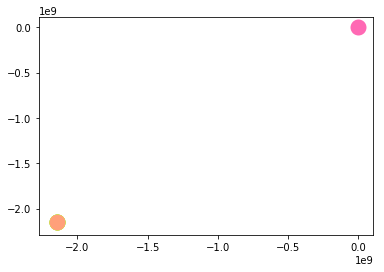

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
#两点距离
def distance(e1,e2):
	return np.sqrt((e1[0]-e2[0])**2+(e1[1]-e2[1]**2))
#集合中心
def means(arr):
	return np.array([np.mean([e[0] for e in arr]),np.mean([e[1] for e in arr])])
#arr中距离a最远的元素，用于初始化聚类中心
def farthest(k_arr,arr):
	f=[0,0]
	max_d=0
	for e in arr:
		d=0
		for i in range(k_arr.__len__()):
			d=d+np.sqrt(distance(k_arr[i],e))
		if d> max_d:
			max_d=d
			f=e
	return f

# arr中距离a最近的元素，用于聚类
def closest(a,arr):
	c=arr[1]
	min_d=distance(a,arr[1])
	arr=arr[1:]
	for e in arr:
		d=distance(a,e)
		if d<min_d:
			min_d=d
			c=e
	return c

if __name__=="__main__":
	##生成二维随机坐标（如果有数据集更好）
	arr=np.random.randint(100,size=(100,1,2))[:,0,:]

	##初始化聚类中心和聚类容器
	m=5
	r=np.random.randint(arr.__len__()-1)
	k_arr=np.array([arr[r]])
	cla_arr=[[]]
	for i in range(m-1):
		k=farthest(k_arr,arr)
		k_arr=np.concatenate([k_arr,np.array([k])])
		cla_arr.append([])

	#迭代聚类
	n=20
	cla_temp=cla_arr
	for i in range(n):   #迭代n次
		for e in arr:  #把集合中每个元素聚到最近的类
			ki=0       #假定距离第一个中心最近
			min_d=distance(e,k_arr[ki])
			for j in range(1,k_arr.__len__()):
				if distance(e,k_arr[j])< min_d:    #找到更近的聚类中心
					min_d=distance(e,k_arr[j])
					ki=j
			cla_temp[ki].append(e)
		#迭代更新聚类中心
		for k in range(k_arr.__len__()):
			if n-1==i:
				break
			k_arr[k]=means(cla_temp[k])
			cla_temp[k]=[]

	##可视化展示
	col=["HotPink","Aqua","Chartreuse","yellow","LightSalmon"]
	for i in range(m):
		plt.scatter(k_arr[i][0],k_arr[i][1],linewidth=10,color=col[i])
		plt.scatter([e[0] for e in cla_temp[i]],[e[1] for e in cla_temp[i]],color=col[i])
	plt.show()